In [1]:
print(2*4)

8


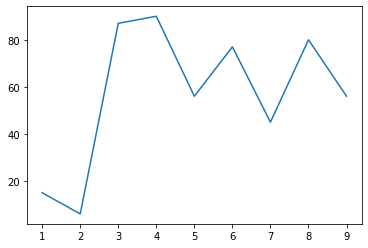

In [4]:
a = (1,2,3,4,5,6,7,8,9)
b = (15,6,87,90,56,77, 45,80, 56)
import matplotlib.pyplot as plt
plt.plot(a,b)
plt.show()

In [31]:
df = pd.read_csv("data2.csv")
print(df)

           Car       Model  Volume  Weight  CO2  AB
0       Toyoty        Aygo    1000     790   99   1
1   Mitsubishi  Space Star    1200    1160   95   2
2        Skoda      Citigo    1000     929   95   3
3         Fiat         500     900     865   90   4
4         Mini      Cooper    1500    1140  105   5
5           VW         Up!    1000     929  105   6
6        Skoda       Fabia    1400    1109   90   7
7     Mercedes     A-Class    1500    1365   92   8
8         Ford      Fiesta    1500    1112   98   9
9         Audi          A1    1600    1150   99  10
10     Hyundai         I20    1100     980   99  11
11      Suzuki       Swift    1300     990  101  12
12        Ford      Fiesta    1000    1112   99  13
13       Honda       Civic    1600    1252   94  14
14      Hundai         I30    1600    1326   97  15
15        Opel       Astra    1600    1330   97  16
16         BMW           1    1600    1365   99  17
17       Mazda           3    2200    1280  104  18
18       Sko

In [34]:
X = df[['Weight', 'Volume', "AB"]]
y = df['CO2']
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300, 4]])

print(predictedCO2)

[89.42232439]


In [35]:
#printing regression coefficient
print(regr.coef_)

[-0.00433968  0.00390587  0.48393823]


In [36]:
print(regr.intercept_)

92.39019228766888


In [37]:
import statsmodels.api as sm
#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     12.29
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           1.63e-05
Time:                        15:44:21   Log-Likelihood:                -109.10
No. Observations:                  36   AIC:                             226.2
Df Residuals:                      32   BIC:                             232.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.3902      6.207     14.884      0.0

## Machine Learning - Train/Test
To measure if the model is good enough, we can use a method called Train/Test.

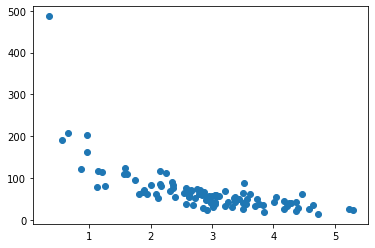

In [44]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x


plt.scatter(x, y)
plt.show()

In [46]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

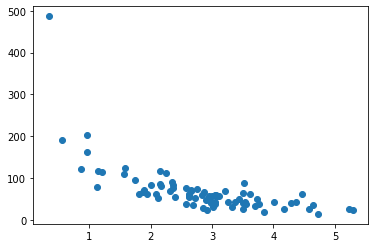

In [47]:
plt.scatter(train_x, train_y)
plt.show()

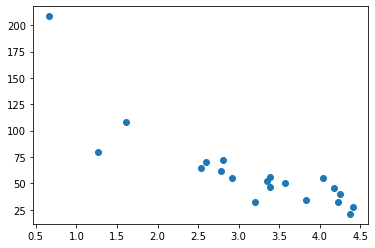

In [48]:
plt.scatter(test_x, test_y)
plt.show()

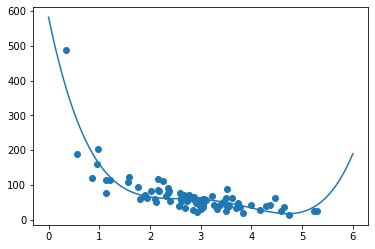

In [49]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

In [52]:
#R-squared 
from sklearn.metrics import r2_score
r2 = r2_score(train_y, mymodel(train_x))

print(r2)

0.79886455446298


In [53]:
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(test_y, mymodel(test_x))

print(r2)

0.8086921460343733


## Decision Tree
In this chapter we will show you how to make a "Decision Tree". A Decision Tree is a Flow Chart, 
and can help you make decisions based on previous experience.

In the example, a person will try to decide if he/she should go to a comedy show or not.

Luckily our example person has registered every time there was a comedy show in town, 
and registered some information about the comedian, and also registered if he/she went or not.

In [58]:
df= pd.read_csv('Data3.csv')

To make a decision tree, all data has to be numerical.

We have to convert the non numerical columns 'Nationality' and 'Go' into numerical values.

Pandas has a map() method that takes a dictionary with information on how to convert the values.

{'UK': 0, 'USA': 1, 'N': 2}

Means convert the values 'UK' to 0, 'USA' to 1, and 'N' to 2.

In [59]:
d = {'UK': 0, 'USA': 1, 'N': 2}
f = {'YES': 0, "NO": 1}
df['Nationality'] = df['Nationality'].map(d)
df['Go'] = df['Go'].map(f)

print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   1
1    42          12     4            1   1
2    23           4     6            2   1
3    52           4     4            1   1
4    43          21     8            1   0
5    44          14     5            0   1
6    66           3     7            2   0
7    35          14     9            0   0
8    52          13     7            2   0
9    35           5     9            2   0
10   24           3     5            1   1
11   18           3     7            0   0
12   45           9     9            0   0


# RESPONSE AND PREDICTOR SAME AS FEATURE AND TARGET
Then we have to separate the feature columns from the target column.

The feature columns are the columns that we try to predict from, a
nd the target column is the column with the values we try to predict.

In [61]:
#X is the feature columns, y is the target column:

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

print(X)
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     1
1     1
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     0
10    1
11    0
12    0
Name: Go, dtype: int64


## Now we can create the actual decision tree, fit it with our details. Start by importing the modules we need:

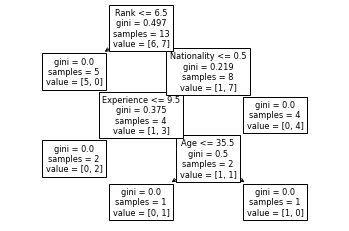

In [1]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pandas.read_csv("Data3.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)
plt.show()

## Hierarchical Clustering
Hierarchical clustering is an unsupervised learning method for clustering data points. The algorithm builds 
clusters by measuring the dissimilarities between data. 
Unsupervised learning means that a model does not have to be trained, and we do not need a "target" variable. 
This method can be used on any data to visualize and interpret the relationship between individual data points.

Here we will use hierarchical clustering to group data points and visualize the clusters using both a 
dendrogram and scatter plot.

How does it work?
We will use Agglomerative Clustering, a type of hierarchical clustering that follows a bottom up approach. 
We begin by treating each data point as its own cluster. Then, we join clusters together that have the 
shortest distance between them to create larger clusters. This step is repeated until one large cluster 
is formed containing all of the data points.

Hierarchical clustering requires us to decide on both a distance and linkage method. We will use
euclidean distance and the Ward linkage method, which attempts to minimize the variance between clusters.

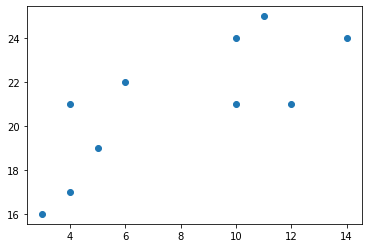

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

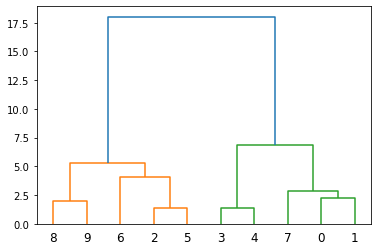

In [3]:
#Now we compute the ward linkage using euclidean distance, and visualize it using a dendrogram:

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

## Logistic Regression
Logistic regression aims to solve classification problems. It does this by predicting categorical outcomes, 
unlike linear regression that predicts a continuous outcome.

In the simplest case there are two outcomes, which is called binomial, an example of which is predicting 
if a tumor is malignant or benign. Other cases have more than two outcomes to classify, in this case it is 
called multinomial. A common example for multinomial logistic regression would be predicting the class 
of an iris flower between 3 different species.

Here we will be using basic logistic regression to predict a binomial variable. This means it has only two possible outcomes.

In [2]:
#X represents the size of a tumor in centimeters.
import numpy
from sklearn import linear_model
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

#Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.
#y represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes").
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)

[0]


In [3]:
log_odds = logr.coef_
odds = numpy.exp(log_odds)

print(odds)

[[4.03541657]]


In [4]:
#This tells us that as the size of a tumor increases by 1mm the odds of it being a tumor increases by 4x.



## Probability
The coefficient and intercept values can be used to find the probability that each tumor is cancerous.

Create a function that uses the model's coefficient and intercept values to return a new value.
This new value represents probability that the given observation is a tumor:

In [6]:
def logit2prob(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)
print(logit2prob(logr, X))

[[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


In [8]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

print(logit.fit(X,y))

print(logit.score(X,y))

LogisticRegression(max_iter=10000)
0.9733333333333334


In [9]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C:
  logit.set_params(C=choice)
  logit.fit(X, y)
  scores.append(logit.score(X, y))

print(scores)

[0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667]


In [14]:
import pandas as pd

cars = pd.read_csv('data2.csv')
print(cars.to_string())

           Car       Model  Volume  Weight  CO2  AB
0       Toyoty        Aygo    1000     790   99   1
1   Mitsubishi  Space Star    1200    1160   95   2
2        Skoda      Citigo    1000     929   95   3
3         Fiat         500     900     865   90   4
4         Mini      Cooper    1500    1140  105   5
5           VW         Up!    1000     929  105   6
6        Skoda       Fabia    1400    1109   90   7
7     Mercedes     A-Class    1500    1365   92   8
8         Ford      Fiesta    1500    1112   98   9
9         Audi          A1    1600    1150   99  10
10     Hyundai         I20    1100     980   99  11
11      Suzuki       Swift    1300     990  101  12
12        Ford      Fiesta    1000    1112   99  13
13       Honda       Civic    1600    1252   94  14
14      Hundai         I30    1600    1326   97  15
15        Opel       Astra    1600    1330   97  16
16         BMW           1    1600    1365   99  17
17       Mazda           3    2200    1280  104  18
18       Sko

In [20]:
import pandas as pd

cars = pd.read_csv('data2.csv')
ohe_cars = pd.get_dummies(cars[['Car']])
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(ohe_cars)

    Car_Audi  Car_BMW  Car_Fiat  Car_Ford  Car_Honda  Car_Hundai  Car_Hyundai  \
0          0        0         0         0          0           0            0   
1          0        0         0         0          0           0            0   
2          0        0         0         0          0           0            0   
3          0        0         1         0          0           0            0   
4          0        0         0         0          0           0            0   
5          0        0         0         0          0           0            0   
6          0        0         0         0          0           0            0   
7          0        0         0         0          0           0            0   
8          0        0         0         1          0           0            0   
9          1        0         0         0          0           0            0   
10         0        0         0         0          0           0            1   
11         0        0       

In [21]:
import pandas
from sklearn import linear_model

cars = pandas.read_csv("data2.csv")
ohe_cars = pandas.get_dummies(cars[['Car']])

X = pandas.concat([cars[['Volume', 'Weight']], ohe_cars], axis=1)
y = cars['CO2']

regr = linear_model.LinearRegression()
regr.fit(X,y)

##predict the CO2 emission of a Volvo where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])

print(predictedCO2)

[122.45153299]


## K-means
K-means is an unsupervised learning method for clustering data points.
The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.

Here, we will show you how to estimate the best value for K using the elbow method, 
then use K-means clustering to group the data points into clusters.

## How does it work?
First, each data point is randomly assigned to one of the K clusters. Then, 
we compute the centroid (functionally the center) of each cluster, and reassign each data point
to the cluster with the closest centroid. We repeat this process until the cluster assignments 
for each data point are no longer changing.

K-means clustering requires us to select K, the number of clusters we want to group the data into. 
The elbow method lets us graph the inertia (a distance-based metric) and visualize the point at which 
it starts decreasing linearly. This point is referred to as the "eblow" and is a good estimate for 
the best value for K based on our data.

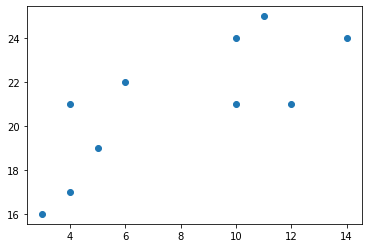

In [1]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

In [4]:
import pandas as pd
data = pd.read_csv('STAM.csv')
data

,name,scores,Height
0,ADEMOLA,34,29.6
1,SULIAT,78,78.9
2,BOLADE,20,56.7


In [22]:
data = pd.DataFrame(data)

In [23]:
data.columns

RangeIndex(start=0, stop=1, step=1)

In [24]:
data = data.rename(columns = {'name  ': 'name'}, inplace = True)
#df = df.rename(columns = {'s/n': 'Number'})

In [27]:
import pandas as pd
sex = pd.read_csv('STAM.csv')
sex

,name,scores,Height
0,ADEMOLA,34,29.6
1,SULIAT,78,78.9
2,BOLADE,20,56.7


In [28]:
sex.columns = ['A', 'B', 'C']

In [29]:
sex

,A,B,C
0,ADEMOLA,34,29.6
1,SULIAT,78,78.9
2,BOLADE,20,56.7


In [30]:
sex.A

0    ADEMOLA
1     SULIAT
2     BOLADE
Name: A, dtype: object

In [38]:
pd.DataFrame(sex[['A','B']])

,A,B
0,ADEMOLA,34
1,SULIAT,78
2,BOLADE,20


In [120]:
df = pd.read_html('https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics')
df = df[0]
df.head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets
0,2021/22,PDF,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,2020/21,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
2,2019/20,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
3,2018/19,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
4,2017/18,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"


In [121]:
df.drop(['Source'], axis = 1, inplace = True)

In [122]:
df.head()

,Year,Revenue,Expenses,Asset rise,Total assets
0,2021/22,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,2020/21,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
2,2019/20,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
3,2018/19,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
4,2017/18,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"


In [123]:
df['Exp'] = df['Expenses'].str[2:].str.replace(',','')
df['Rev'] = df['Revenue'].str[2:].str.replace(',','')
df['Asset'] = df['Asset rise'].str[2:].str.replace(',','')
df['Total'] = df['Total assets'].str[2:].str.replace(',','')
df.head()

,Year,Revenue,Expenses,Asset rise,Total assets,Exp,Rev,Asset,Total
0,2021/22,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532",145970915,154686521,8173996,239351532
1,2020/21,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536",111839819,162886686,50861811,231177536
2,2019/20,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725",112489397,129234327,14674300,180315725
3,2018/19,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425",91414010,120067266,30691855,165641425
4,2017/18,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570",81442265,104505783,21619373,134949570


In [124]:
df.columns

Index(['Year', 'Revenue', 'Expenses', 'Asset rise', 'Total assets', 'Exp',
       'Rev', 'Asset', 'Total'],
      dtype='object')

In [125]:
df.drop(['Revenue', 'Expenses', 'Asset rise', 'Total assets'], axis =1, inplace = True)

In [126]:
df.head()

,Year,Exp,Rev,Asset,Total
0,2021/22,145970915,154686521,8173996,239351532
1,2020/21,111839819,162886686,50861811,231177536
2,2019/20,112489397,129234327,14674300,180315725
3,2018/19,91414010,120067266,30691855,165641425
4,2017/18,81442265,104505783,21619373,134949570


In [127]:
df.dtypes

Year     object
Exp      object
Rev      object
Asset    object
Total    object
dtype: object

In [128]:
df['Exp'] = pd.to_numeric(df['Exp'])
df['Rev'] = pd.to_numeric(df['Rev'])
df['Asset'] = pd.to_numeric(df['Asset'])
df['Total'] = pd.to_numeric(df['Total'])

In [129]:
df.dtypes

Year     object
Exp       int64
Rev       int64
Asset     int64
Total     int64
dtype: object

In [130]:
df['Year'] = pd.to_numeric(df['Year'].str[:-3])

In [131]:
df.head()

,Year,Exp,Rev,Asset,Total
0,2021,145970915,154686521,8173996,239351532
1,2020,111839819,162886686,50861811,231177536
2,2019,112489397,129234327,14674300,180315725
3,2018,91414010,120067266,30691855,165641425
4,2017,81442265,104505783,21619373,134949570


In [132]:
df.dtypes

Year     int64
Exp      int64
Rev      int64
Asset    int64
Total    int64
dtype: object

In [133]:
df.set_index('Year', inplace = True)

In [134]:
df.head()

,Exp,Rev,Asset,Total
Year,,,,
2021,145970915,154686521,8173996,239351532
2020,111839819,162886686,50861811,231177536
2019,112489397,129234327,14674300,180315725
2018,91414010,120067266,30691855,165641425
2017,81442265,104505783,21619373,134949570


In [137]:
df.dtypes

Exp      int64
Rev      int64
Asset    int64
Total    int64
dtype: object

In [139]:
df.sort_index(inplace = True) #sort from the least year to the current year
df.head()

,Exp,Rev,Asset,Total
Year,,,,
2003,23463,80129,56666,56666
2004,177670,379088,211418,268084
2005,791907,1508039,736132,1004216
2006,2077843,2734909,654066,1658282
2007,3540724,5032981,3519886,5178168


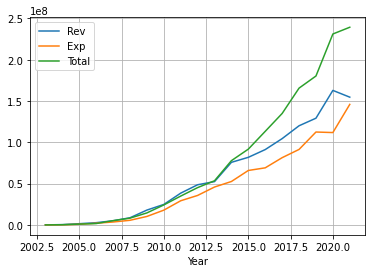

In [150]:
import matplotlib.pyplot as plt
df[['Rev','Exp','Total']].plot()
plt.grid()
plt.show()

# ADDING PERCENTAGE ON BAR CHART

In [2]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
 
# assign data
data = pd.DataFrame({'Format': ['Test', 'ODI', 'T20I', 'IPL'],
                     'Matches': [90, 350, 98, 204],
                     'Runs': [4876, 10773, 1617, 4632]
                     })
 
# display data
display(data)

,Format,Matches,Runs
0,Test,90,4876
1,ODI,350,10773
2,T20I,98,1617
3,IPL,204,4632


In [3]:
# get total matches of
# a particular player
total_matches = data.Matches.sum()
print('Total matches played by MS Dhoni: %s' % total_matches)
 
# get total runs of
# a particular player
total_runs = data.Runs.sum()
print('Total runs scored by MS Dhoni: %s' % total_runs)

Total matches played by MS Dhoni: 742
Total runs scored by MS Dhoni: 21898


In [4]:
percentage_Matches = []
for i in data.Matches:
    pct = (i / total_matches) * 100
    percentage_Matches.append(round(pct, 2))
print(percentage_Matches)

[12.13, 47.17, 13.21, 27.49]


In [5]:
percentage_Runs = []
for i in data.Runs:
    pct = (i / total_runs) * 100
    percentage_Runs.append(round(pct, 2))
print(percentage_Runs)

[22.27, 49.2, 7.38, 21.15]


In [6]:
data['percentage_Runs'] = percentage_Runs
data['percentage_Matches'] = percentage_Matches
data

,Format,Matches,Runs,percentage_Runs,percentage_Matches
0,Test,90,4876,22.27,12.13
1,ODI,350,10773,49.20,47.17
2,T20I,98,1617,7.38,13.21
3,IPL,204,4632,21.15,27.49


In [7]:
data.columns

Index(['Format', 'Matches', 'Runs', 'percentage_Runs', 'percentage_Matches'], dtype='object')

<BarContainer object of 4 artists>

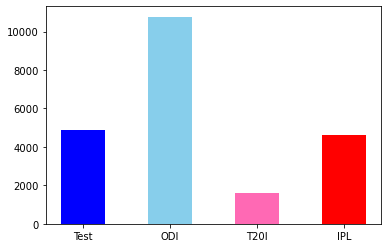

In [8]:
colour = ['blue', 'skyblue','hotpink', 'Red' ]
plt.bar(data['Format'], data['Runs'], color = colour, width = 0.5)

([<matplotlib.patches.Wedge at 0x26d7aa25310>,
 [Text(0.8416562085498259, 0.7082477155695824, ''),
  Text(-1.0787288975423361, 0.2152764864240777, ''),
  Text(0.010730968217360685, -1.0999476561732917, ''),
  Text(0.8659280232934335, -0.6783573235951145, '')])

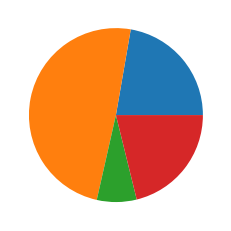

In [9]:
colour = ['blue', 'skyblue','hotpink', 'Red' ]
plt.pie(data['Runs'])

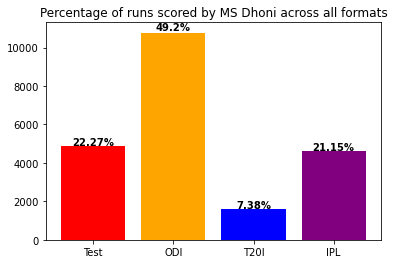

In [10]:
#plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(data.Format,data.Runs, color = colors_list)
plt.title('Percentage of runs scored by MS Dhoni across all formats')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data.percentage_Runs[i])+'%',
             ha='center', weight='bold')
    i+=1
plt.show()

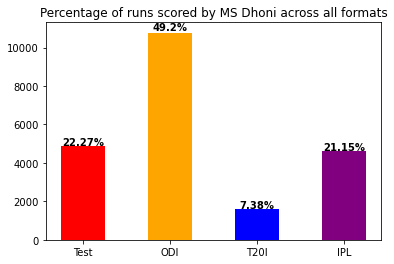

In [11]:
#plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(data.Format,data.Runs, color = colors_list, width = 0.5)
plt.title('Percentage of runs scored by MS Dhoni across all formats')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data.percentage_Runs[i])+'%',
             ha='center', weight='bold')
    i+=1
plt.show()

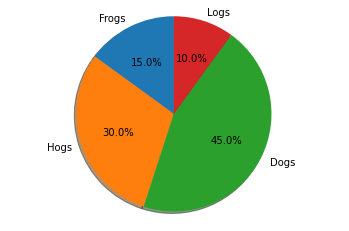

In [12]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [13]:
data.columns

Index(['Format', 'Matches', 'Runs', 'percentage_Runs', 'percentage_Matches'], dtype='object')

In [14]:
data

,Format,Matches,Runs,percentage_Runs,percentage_Matches
0,Test,90,4876,22.27,12.13
1,ODI,350,10773,49.20,47.17
2,T20I,98,1617,7.38,13.21
3,IPL,204,4632,21.15,27.49


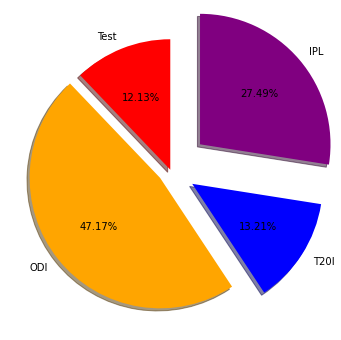

In [15]:
plt.figure(figsize = (6,6))
colors_list = ['Red','Orange', 'Blue', 'Purple']
explode = (0, 0.1, 0.2, 0.3)
plt.pie(data.percentage_Matches, labels = data.Format, autopct = '%.2f%%', startangle = 90, 
        colors = colors_list, explode = explode, shadow = True)
plt.show()

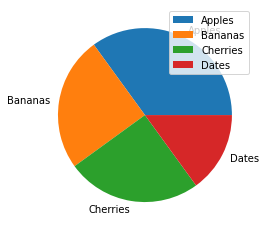

In [16]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]

plt.pie(y, labels = mylabels)
plt.legend()
plt.show() 

In [21]:
jm =pd.DataFrame({"category": ['AB','CK', 'JF','CM', 'RC', 'AM'], 'Price': [23,45,67,78,35,98]})
jm

,category,Price
0,AB,23
1,CK,45
2,JF,67
3,CM,78
4,RC,35
5,AM,98


In [31]:
#adding row to the data
jm = jm.append({'category': 'CSO', 'Price': 50}, ignore_index = True)

In [32]:
y =round(jm.Price.mean())
y
jm = jm.append({'category': 'Mean', 'Price': y}, ignore_index = True)

In [33]:
jm

,category,Price
0,AB,23
1,CK,45
2,JF,67
3,CM,78
4,RC,35
5,AM,98
6,CSO,50
7,Mean,57


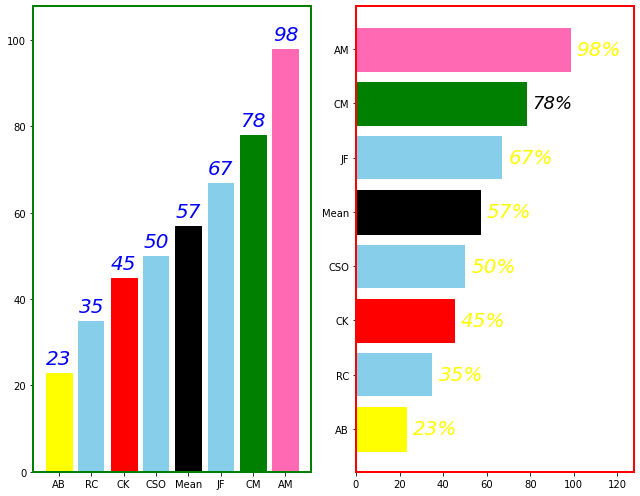

In [166]:
plt.figure(figsize = (9,7))
ax1 = plt.subplot(1,2,1)
jm = jm.sort_values('Price')
graph = ax1.bar(jm['category'], jm['Price'], color = 'skyblue')
graph[4].set_color('Black')
graph[2].set_color('red')
graph[7].set_color('hotpink')
graph[0].set_color('yellow')
graph[6].set_color('green')
#ax1.yaxis.grid(linestyle = '--', linewidth = 1)
for i,v in enumerate(jm.Price):
    ax1.annotate('{:,}'.format(v), xy = (i,v+2), fontstyle = 'italic' , ha = 'center', fontsize = 20, color = 'blue')
ax1.set_ylim(0, jm.Price.max()* 1.1)
for j in ['top','bottom','right','left']:
    ax1.spines[j].set_linewidth(2)
    ax1.spines[j].set_color('green')

# second plot
ax2 = plt.subplot(1,2,2)
jm = jm.sort_values('Price')
graph = ax2.barh(jm['category'], jm['Price'], color = 'skyblue')
graph[4].set_color('Black')
graph[2].set_color('red')
graph[7].set_color('hotpink')
graph[0].set_color('yellow')
graph[6].set_color('green')
#ax2.xaxis.grid(linestyle = '--', linewidth = 1)
for i,v in enumerate(jm.Price): # will list out values with index
    if i == 6:
        ax2.annotate((str(v)+'%'), xy = (v+3,i), fontstyle = 'oblique', va = 'center', fontsize = 18)
    else:
        ax2.annotate((str(v)+'%'), xy = (v+3,i), fontstyle = 'oblique', va = 'center', fontsize = 20, color = 'yellow')
ax2.set_xlim(0, jm.Price.max()* 1.3)
for j in ['top','bottom','right','left']:
    ax2.spines[j].set_linewidth(2)
    ax2.spines[j].set_color('red')
    
plt.tight_layout()
plt.show()

In [45]:
jm

,category,Price
0,AB,23
4,RC,35
1,CK,45
6,CSO,50
7,Mean,57
2,JF,67
3,CM,78
5,AM,98


In [167]:
data

,Format,Matches,Runs,percentage_Runs,percentage_Matches
0,Test,90,4876,22.27,12.13
1,ODI,350,10773,49.20,47.17
2,T20I,98,1617,7.38,13.21
3,IPL,204,4632,21.15,27.49


In [172]:
data

,Format,Matches,Runs,percentage_Runs
0,Test,90,4876,22.27
1,ODI,350,10773,49.20
2,T20I,98,1617,7.38
3,IPL,204,4632,21.15


In [184]:
percentage = []
total_Matches = data.Matches.sum()
for i in data.Matches:
    pct = (i/total_Matches)*100
    percentage.append(round(pct,1))
print(percentage)
data['Percentage_Matches'] = percentage

[12.1, 47.2, 13.2, 27.5]


In [175]:
total_Matches = data.Matches.sum()
total_Matches

742

In [185]:
data

,Format,Matches,Runs,percentage_Runs,Percentage_Matches
0,Test,90,4876,22.27,12.1
1,ODI,350,10773,49.20,47.2
2,T20I,98,1617,7.38,13.2
3,IPL,204,4632,21.15,27.5


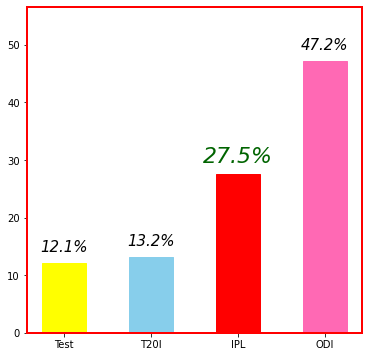

In [238]:
# plotting runs and putting percentage on it

plt.figure(figsize = (6,6))
ax = plt.subplot(1,1,1)
data = data.sort_values('Matches')
graph = plt.bar(data['Format'], data.Percentage_Matches, width = 0.5, color = 'skyblue')
graph[1].set_color('skyblue')
graph[2].set_color('red')
graph[3].set_color('hotpink')
graph[0].set_color('yellow')

for i, j in enumerate(data.Percentage_Matches):
    if i == 2:
        plt.annotate(str(j)+'%', xy = (i,j+2), color = 'darkgreen', fontstyle = 'italic', fontsize = 22, ha = 'center') 
    else:
        plt.annotate(str(j)+'%', xy = (i,j+2), fontstyle = 'italic', fontsize = 15, ha = 'center') 
ax.set_ylim(0, data.Percentage_Matches.max()*1.2)
for j in ['top','bottom','right','left']:
    ax.spines[j].set_linewidth(2)
    ax.spines[j].set_color('red')

plt.show()

In [199]:
data

,Format,Matches,Runs,percentage_Runs,Percentage_Matches
0,Test,90,4876,22.27,12.1
2,T20I,98,1617,7.38,13.2
3,IPL,204,4632,21.15,27.5
1,ODI,350,10773,49.20,47.2


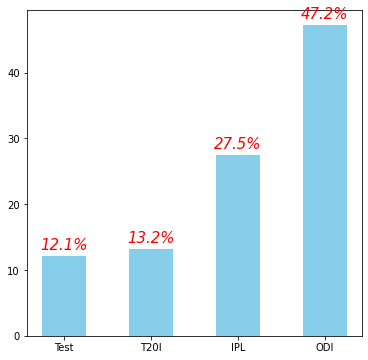

In [254]:
plt.figure(figsize = (6,6))
ax = plt.subplot(1,1,1)
data = data.sort_values('Matches')
plt.bar(data['Format'], data.Percentage_Matches, width = 0.5, color = 'skyblue')

#for m in data.Matches:
for l,k in enumerate(data.Percentage_Matches):
    plt.text(l,k+1, f'{k}'+'%', ha = 'center', fontstyle = 'italic', fontsize = 15, fontweight = 500, color = 'red')
    
plt.show()